<a href="https://colab.research.google.com/github/dfklsna/sangwoo-Kim/blob/main/Knn_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
targetUrl = "https://raw.githubusercontent.com/dfklsna/sangwoo-Kim/main/fake_bills.csv"
df = pd.read_csv(targetUrl, sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [131]:
one_hot_encoded = pd.get_dummies(df['is_genuine'])
df.drop('is_genuine', axis=1, inplace=True)
df = pd.concat([df, one_hot_encoded], axis=1)
print(df)

      diagonal  height_left  height_right  margin_low  margin_up  length  \
0       171.81       104.86        104.95        4.52       2.89  112.83   
1       171.46       103.36        103.66        3.77       2.99  113.09   
2       172.69       104.48        103.50        4.40       2.94  113.16   
3       171.36       103.91        103.94        3.62       3.01  113.51   
4       171.73       104.28        103.46        4.04       3.48  112.54   
...        ...          ...           ...         ...        ...     ...   
1495    171.75       104.38        104.17        4.42       3.09  111.28   
1496    172.19       104.63        104.44        5.27       3.37  110.97   
1497    171.80       104.01        104.12        5.51       3.36  111.95   
1498    172.06       104.28        104.06        5.17       3.46  112.25   
1499    171.47       104.15        103.82        4.63       3.37  112.07   

      False  True  
0         0     1  
1         0     1  
2         0     1  
3      

In [132]:
missing_values = df.isna()
num_missing = missing_values.sum()
print(num_missing)

diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
False            0
True             0
dtype: int64


<Axes: >

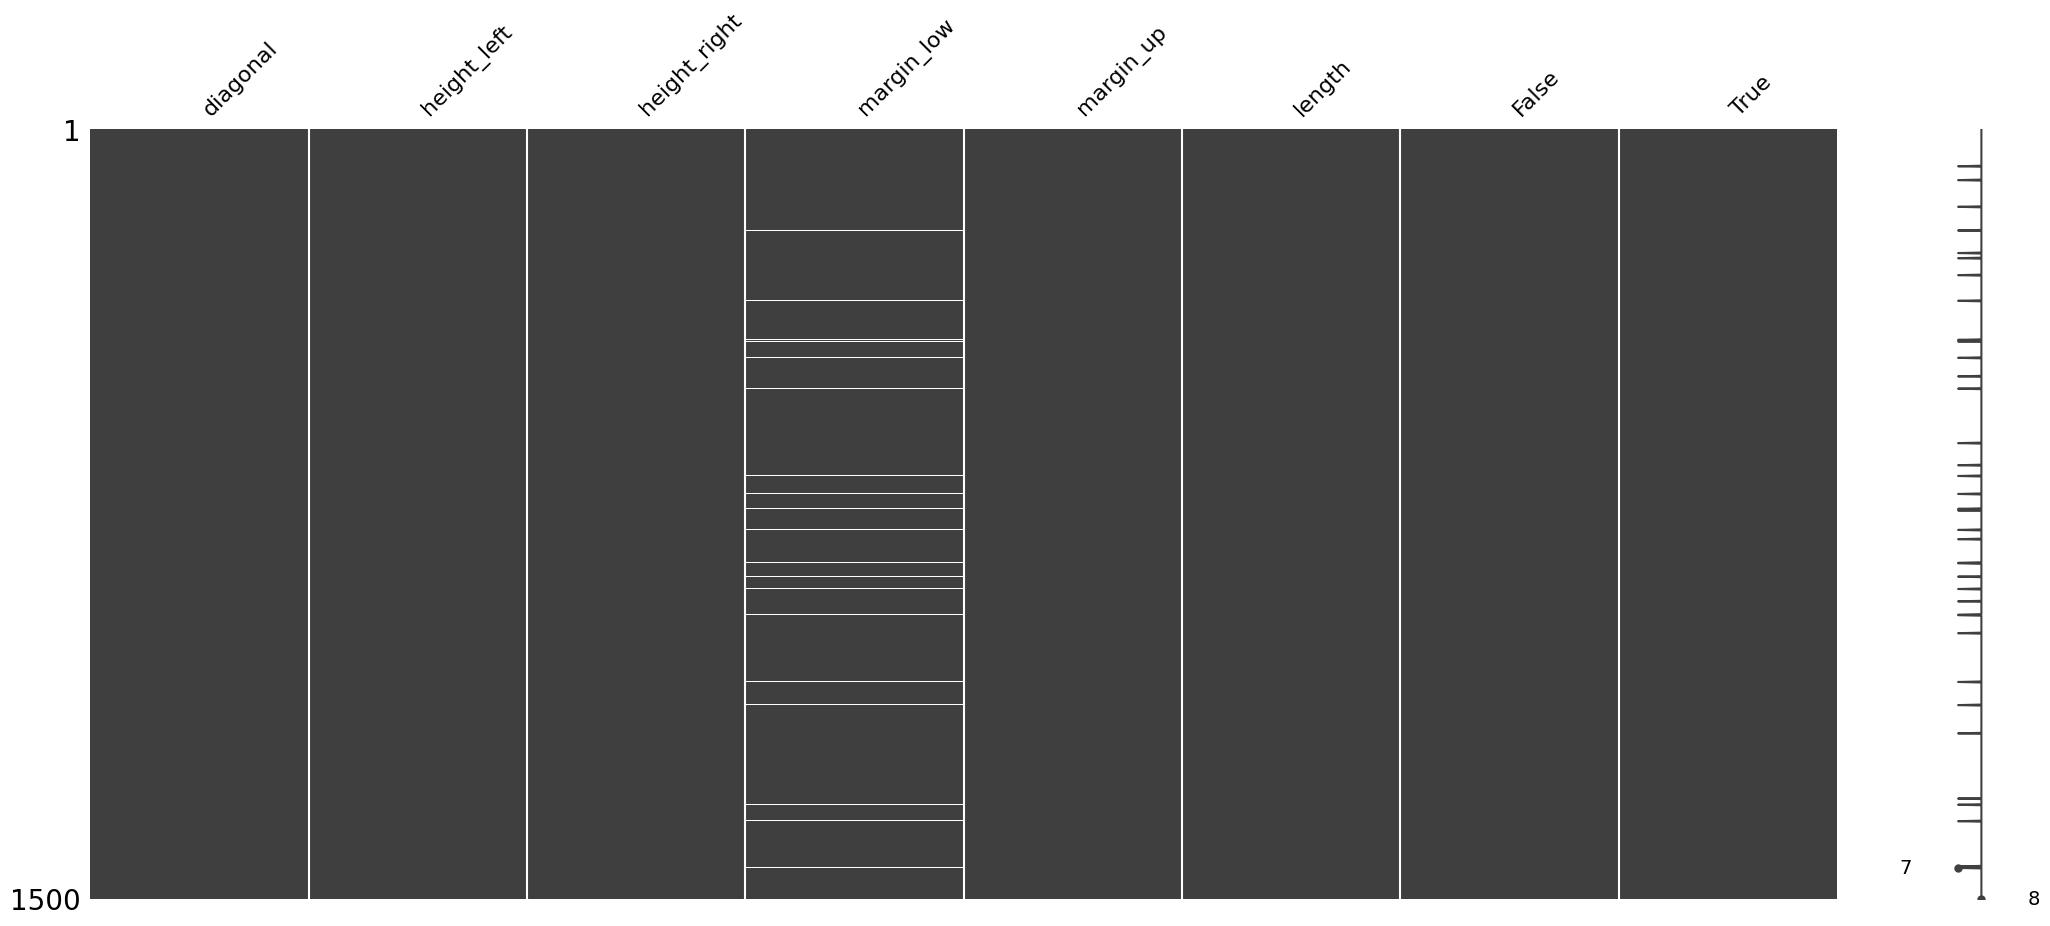

In [133]:
import missingno as msno
msno.matrix(df)

<Axes: >

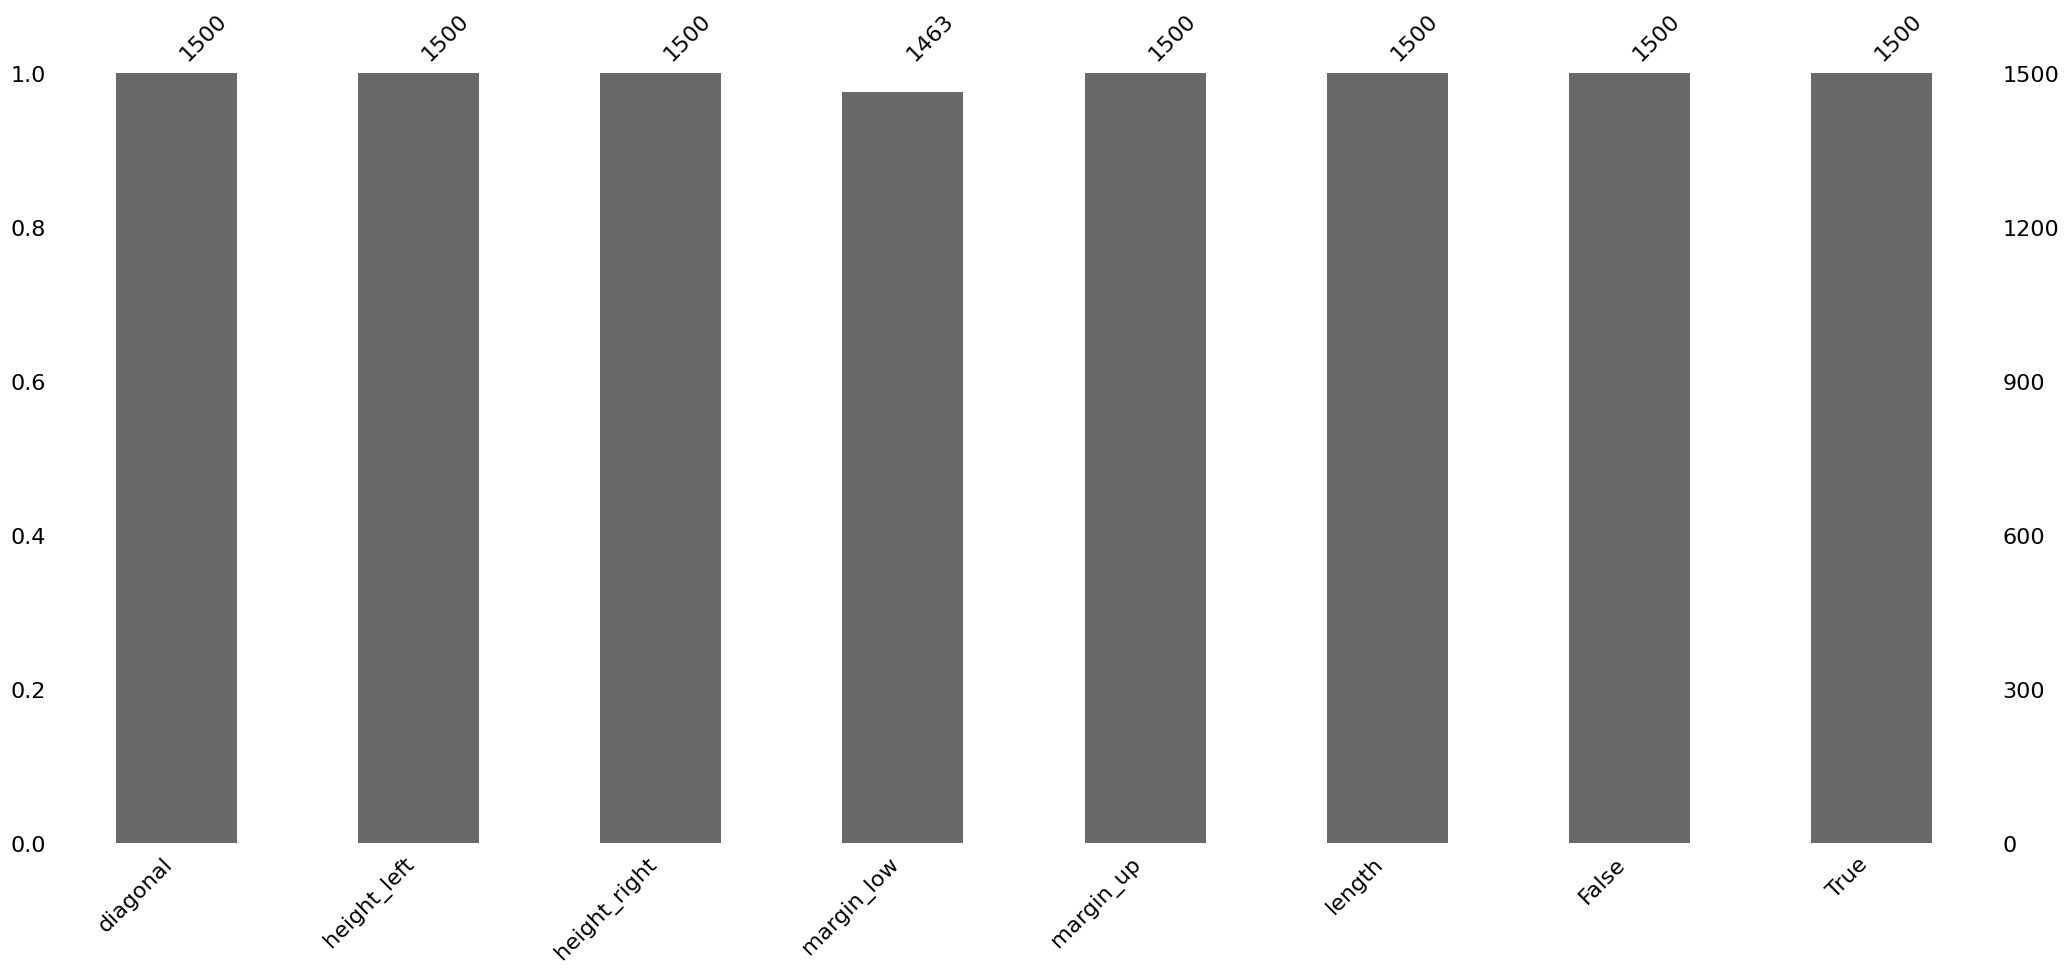

In [134]:
import missingno as msno
msno.bar(df)

In [135]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
filled_values = imputer.fit_transform(df[['margin_low']])
df['margin_low'] = filled_values
missing_values = df.isna()
num_missing = missing_values.sum()
print(num_missing)

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
False           0
True            0
dtype: int64


[[ 1.          0.01947232 -0.02449201 -0.11024358 -0.05564888  0.09758729
  -0.13275633  0.13275633]
 [ 0.01947232  1.          0.24227881  0.29902799  0.24652224 -0.32086276
   0.37983292 -0.37983292]
 [-0.02449201  0.24227881  1.          0.3845134   0.30700464 -0.40175122
   0.48509183 -0.48509183]
 [-0.11024358  0.29902799  0.3845134   1.          0.42560768 -0.6588437
   0.7750152  -0.7750152 ]
 [-0.05564888  0.24652224  0.30700464  0.42560768  1.         -0.52057513
   0.60626226 -0.60626226]
 [ 0.09758729 -0.32086276 -0.40175122 -0.6588437  -0.52057513  1.
  -0.84928463  0.84928463]
 [-0.13275633  0.37983292  0.48509183  0.7750152   0.60626226 -0.84928463
   1.         -1.        ]
 [ 0.13275633 -0.37983292 -0.48509183 -0.7750152  -0.60626226  0.84928463
  -1.          1.        ]]


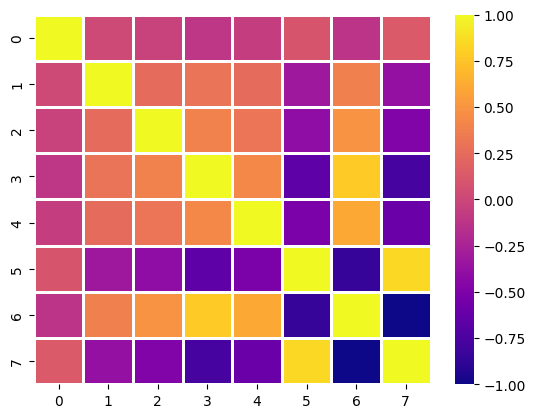

In [136]:
import numpy as np
corr_matrix = np.corrcoef(df.values.T)
print(corr_matrix)
sns.heatmap(corr_matrix,linewidth=1,cmap='plasma')
plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['margin_low', 'margin_up', 'length', 'height_right', 'height_left', 'diagonal']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head()) 

   diagonal  height_left  height_right  margin_low  margin_up    length  \
0 -0.486540     2.774123      3.163240    0.051931  -1.128325  0.173651   
1 -1.633729    -2.236535     -0.799668   -1.092495  -0.696799  0.471666   
2  2.397823     1.504756     -1.291191   -0.131177  -0.912562  0.551901   
3 -1.961498    -0.399294      0.060498   -1.321380  -0.610494  0.953075   
4 -0.748754     0.836669     -1.414072   -0.680502   1.417677 -0.158750   

   False  True  
0      0     1  
1      0     1  
2      0     1  
3      0     1  
4      0     1  


In [151]:
print(df.info())
print( df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1500 non-null   float64
 1   height_left   1500 non-null   float64
 2   height_right  1500 non-null   float64
 3   margin_low    1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
 6   False         1500 non-null   uint8  
 7   True          1500 non-null   uint8  
dtypes: float64(6), uint8(2)
memory usage: 73.4 KB
None
Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length', 'False', 'True'],
      dtype='object')


In [153]:
df.columns = df.columns.astype(str)
from sklearn.model_selection import train_test_split
X = df.drop(['False', 'True'], axis=1)
y = df[['False', 'True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
1166,-0.224325,0.669647,1.842271,0.174003,-0.006358,-1.992690
1496,0.758981,2.005822,1.596509,1.196357,0.942999,-1.958303
1339,-0.683201,0.435816,0.951385,1.928789,0.425168,-1.144493
1099,-2.518704,0.502625,0.275540,0.509701,0.123100,-1.087182
120,-0.125994,-0.833551,-0.953269,-0.711020,0.684084,0.265348


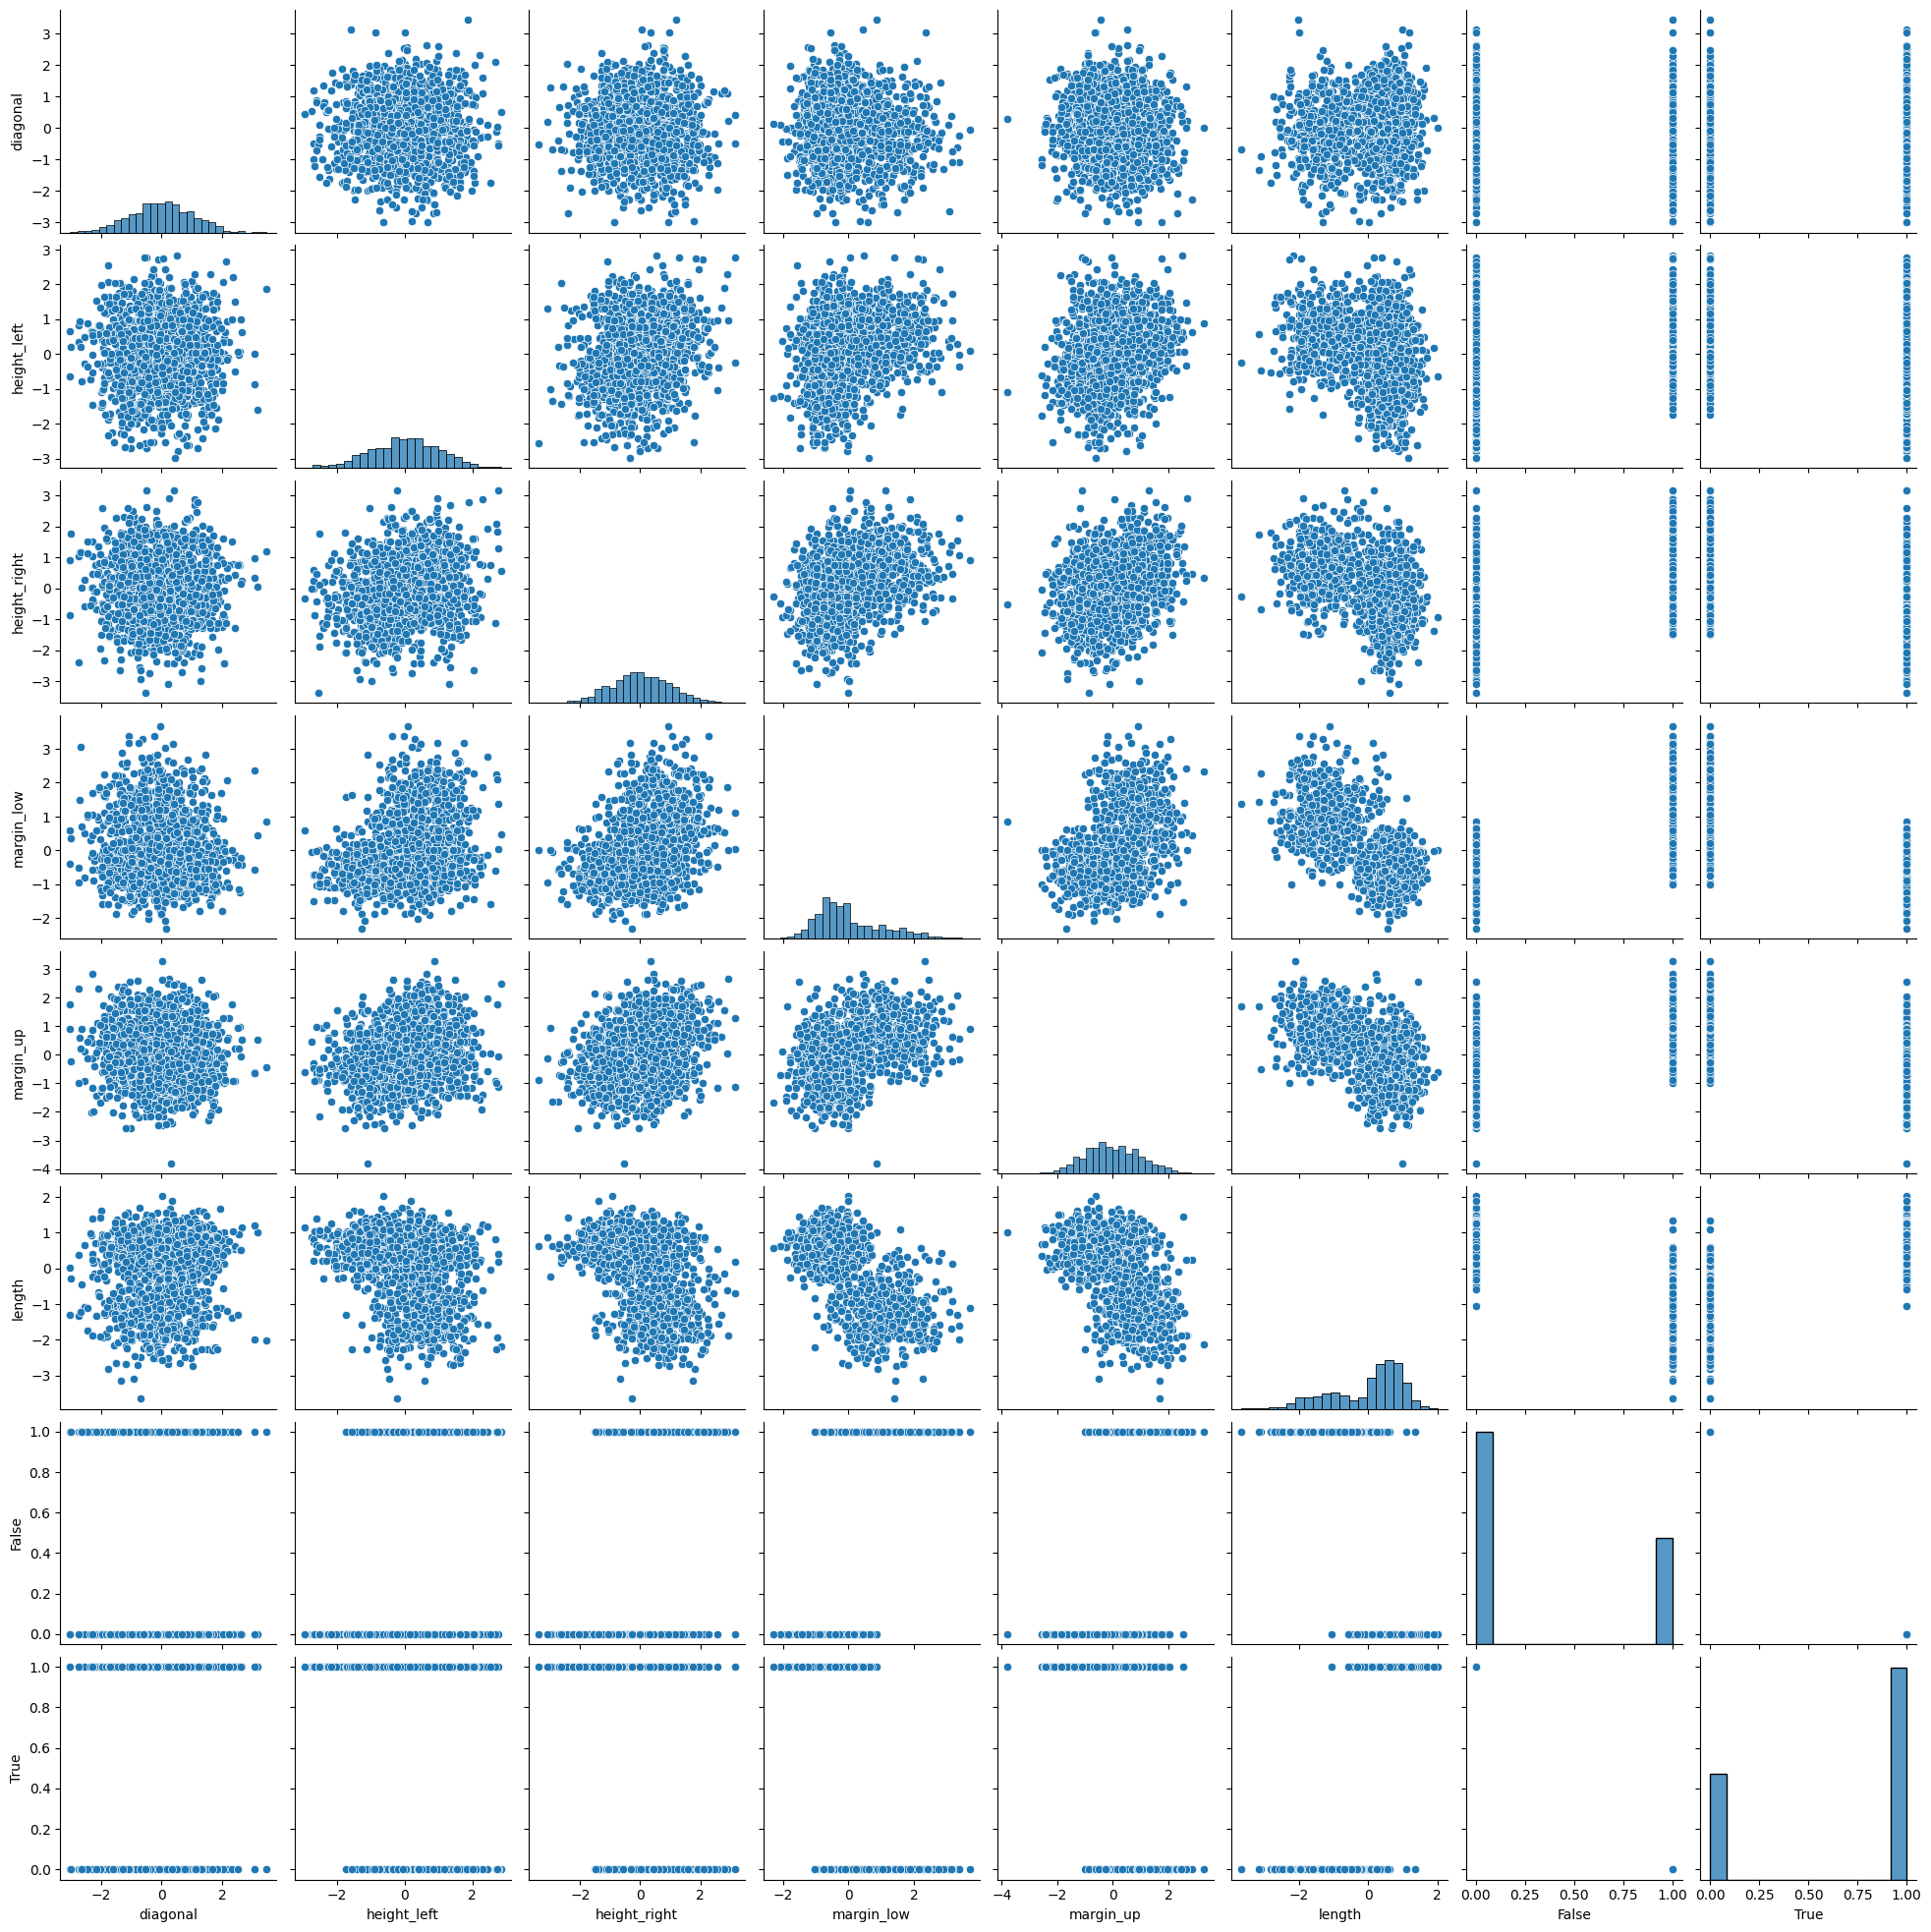

In [154]:
import seaborn as sns
sns.pairplot(df)

In [155]:
y_train.head()

,False,True
1166,1,0
1496,1,0
1339,1,0
1099,1,0
120,0,1


In [157]:
y_test.head()

,False,True
1352,1,0
282,0,1
600,0,1
875,0,1
619,0,1


In [159]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11,13,15,17]}
grid_search = GridSearchCV(knn_model, param_grid, cv=10, error_score='raise')
grid_search.fit(X_train, y_train)
print('Best hyper-parameter:', grid_search.best_params_)

Best hyper-parameter: {'n_neighbors': 3}


In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.9888888888888889
